In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [240]:
data= pd.read_csv(r"C:\Users\Arvind Vasa\AI-ML\stats and ML\Capstone Project\HR_Employee_Attrition_Data.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


### data information

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

### Null value check

In [242]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [243]:
data.shape

(2940, 35)

### Extracting numerical features

In [244]:
numerical_features= data.select_dtypes(include= int).columns
numerical_features

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### 0 Variance Check

In [245]:
for i in range(len(numerical_features)):
    if data[numerical_features[i]].var()==0:
        print(numerical_features[i])

EmployeeCount
StandardHours


### Droping 0 variance features

In [246]:
data.drop(['EmployeeCount','StandardHours'], axis=1, inplace= True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,3,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,5,1,...,3,4,1,6,3,3,2,2,2,2


### Exploratory data analysis

<Axes: xlabel='Attrition', ylabel='count'>

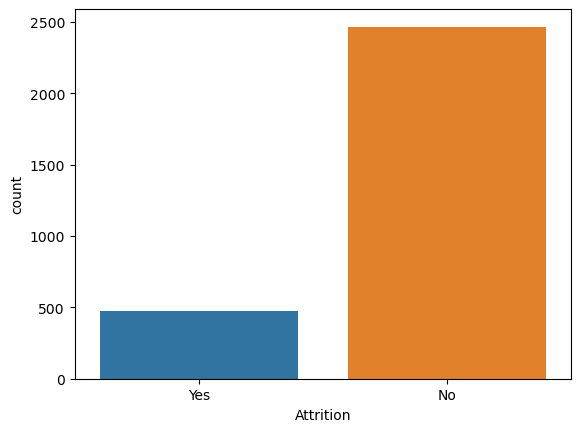

In [247]:
sns.countplot(x= data['Attrition'])

In [248]:
attrited_percentage= ((data['Attrition']=='Yes').sum())/len(data['Attrition']) *100
attrited_percentage

16.122448979591837

<Axes: xlabel='Attrition', ylabel='Age'>

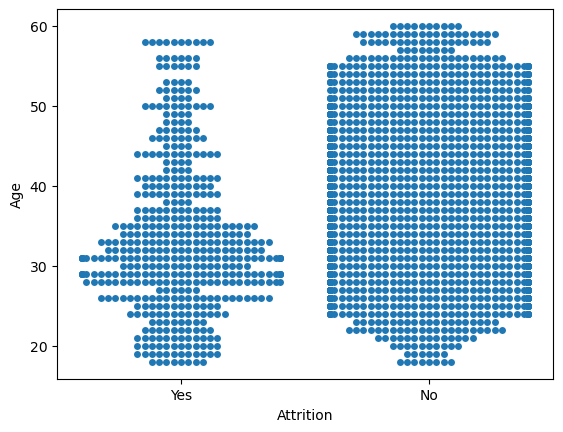

In [257]:
sns.swarmplot(y= data['Age'], x= data['Attrition'])

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

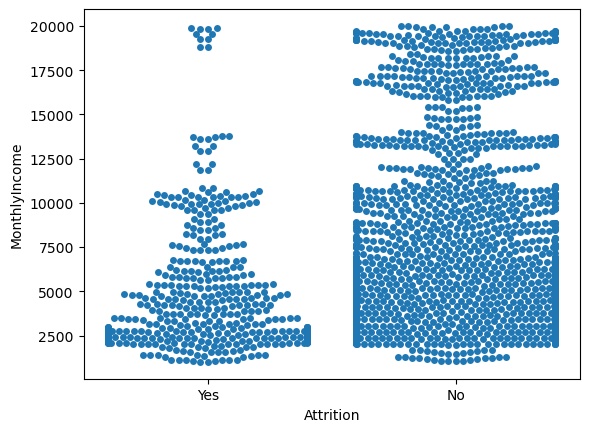

In [260]:
sns.swarmplot(x=data['Attrition'], y=data['MonthlyIncome'])

# peoples monthly income less than 7000 are attriting more

### Outlier analysis on numerical features

In [261]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,...,0.360762,1.081025,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [262]:
mean_med_data= data.describe().loc[['mean','50%'],:]
mean_med_data

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
mean,36.92381,802.485714,9.192517,2.912925,1470.5,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.79932,2.761224,7.008163,4.229252,2.187755,4.123129
50%,36.00000,802.000000,7.000000,3.000000,1470.5,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.00000,3.000000,5.000000,3.000000,1.000000,3.000000


In [263]:
indexes= []
diff= []
for feature in mean_med_data:
    indexes.append(feature)
    diff.append(mean_med_data.loc['mean',feature]- mean_med_data.loc['50%',feature] )
mean_med_df= pd.DataFrame(diff, index=[indexes], columns=['mean med diff'])
final_mean_med_df= mean_med_df.sort_values(by='mean med diff', ascending= False)
final_mean_med_df

,mean med diff
MonthlyIncome,1583.931293
MonthlyRate,77.603401
DistanceFromHome,2.192517
YearsAtCompany,2.008163
TotalWorkingYears,1.279592
YearsInCurrentRole,1.229252
PercentSalaryHike,1.209524
YearsSinceLastPromotion,1.187755
YearsWithCurrManager,1.123129
Age,0.923810


### Univariate Analysis

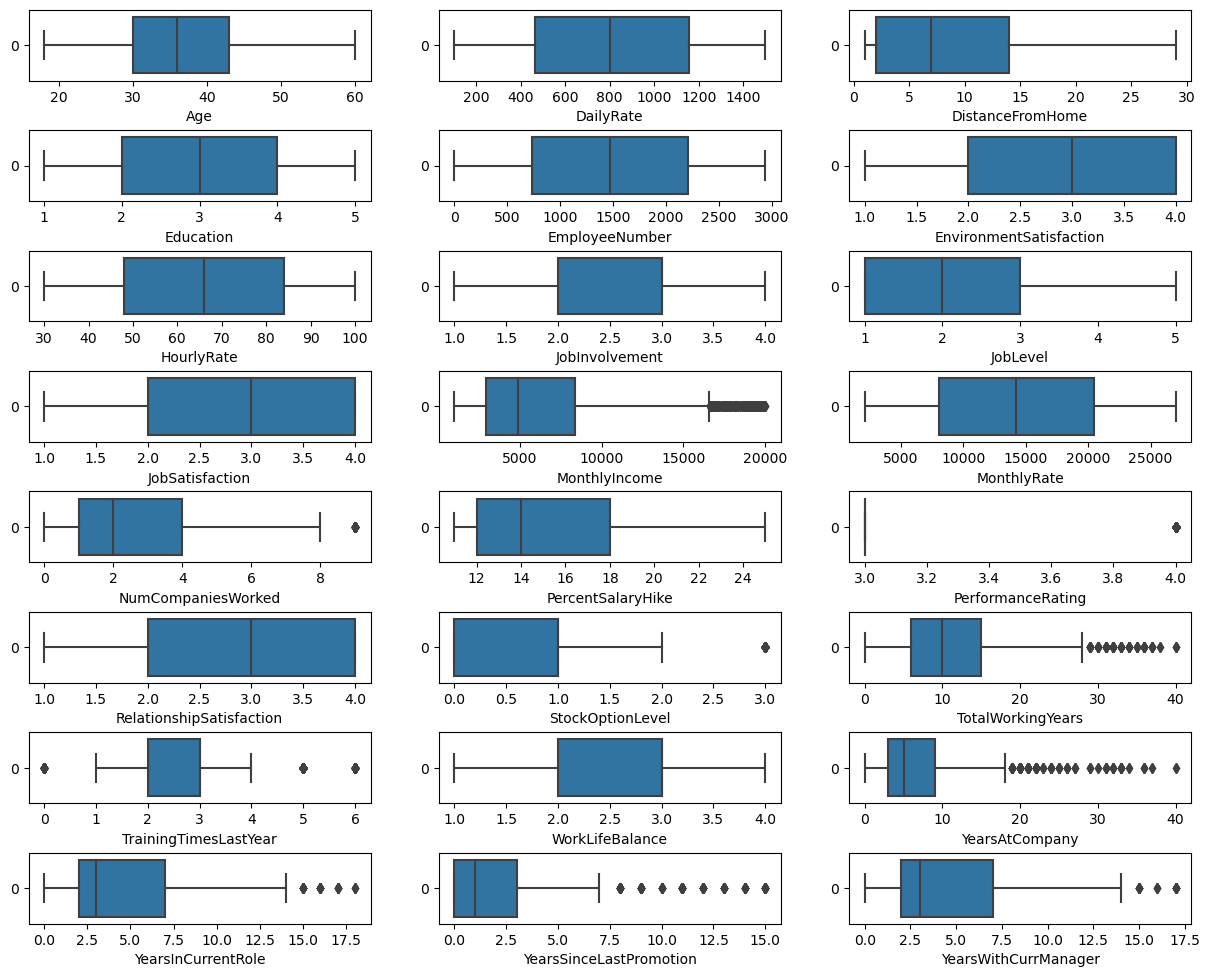

In [264]:
numerical_features= data.select_dtypes(include=int).columns
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace= 0.7, wspace= 0.2)
for i in range(len(numerical_features)):
    plt.subplot(10,3, i+1)
    plt.xlabel(numerical_features[i])
    sns.boxplot(data[numerical_features[i]],orient='h')

### Conclusions after univariate analysis

- There are few features that contain extreme outliers, they needs handling

### Bivariate Analysis

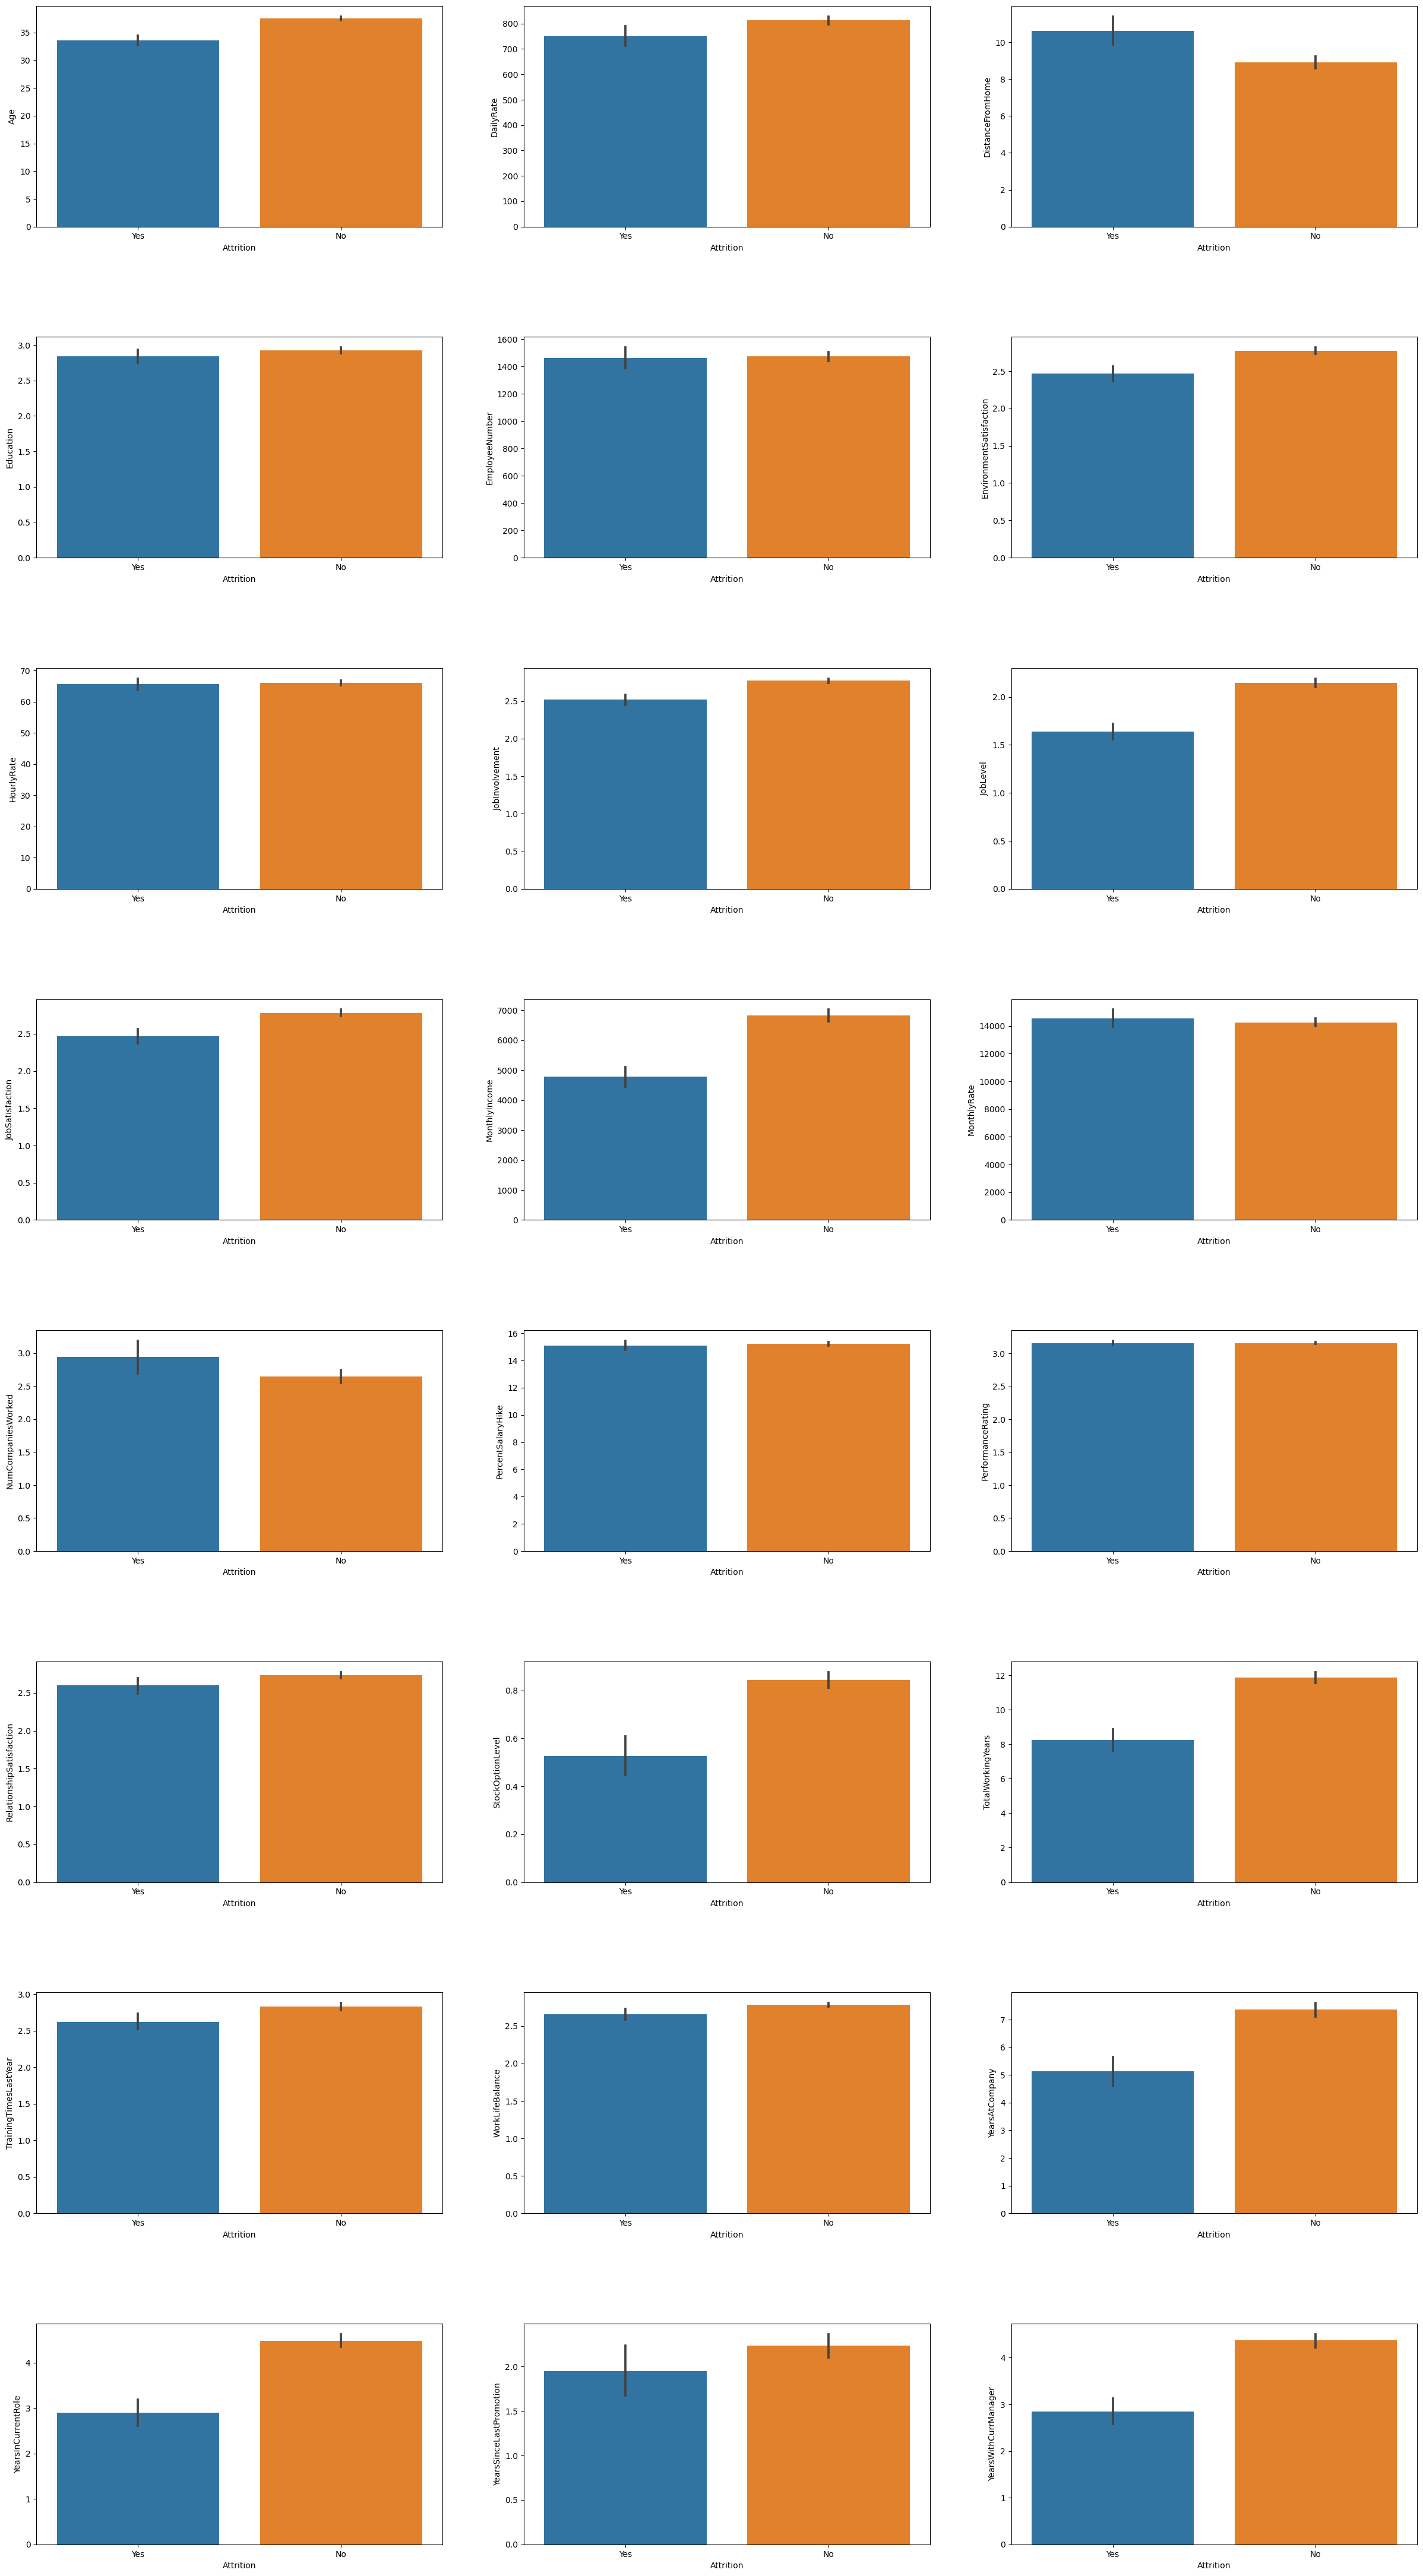

In [265]:
numerical_features= data.select_dtypes(include=int).columns
plt.figure(figsize=(30,70))
plt.subplots_adjust(hspace= 0.5, wspace= 0.2)
for i in range(len(numerical_features)):
    plt.subplot(10,3, i+1)
    plt.xlabel(numerical_features[i])
    sns.barplot(x= data['Attrition'], y= data[numerical_features[i]])

### Label encoding

In [266]:
from sklearn.preprocessing import LabelEncoder

In [267]:
data2= data.copy()
data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,3,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,5,1,...,3,4,1,6,3,3,2,2,2,2


In [268]:
label_encoder= LabelEncoder()

In [269]:
data2 = data2.apply(label_encoder.fit_transform)
data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,1,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,1,2,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,2,3,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,3,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,4,0,...,0,3,1,6,3,2,2,2,2,2


### Normalizing Data

In [270]:
from sklearn.preprocessing import StandardScaler

In [271]:
scaler= StandardScaler()
col_names= data2.drop('Attrition',axis=1).columns
normalized_data= pd.DataFrame(scaler.fit_transform(data2.drop('Attrition',axis=1)), columns=col_names)
normalized_data['Attrition']= data2['Attrition']
normalized_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.446350,0.590048,0.713914,1.401512,-1.010909,-0.891688,-0.937414,-1.731462,-0.660531,-1.224745,...,-1.584178,-0.932014,-0.421735,-2.171982,-2.493820,-0.163801,-0.063296,-0.679146,0.245834,1
1,1.322365,-0.913194,-1.302446,-0.493817,-0.147150,-1.868426,-0.937414,-1.730284,0.254625,0.816497,...,1.191438,0.241988,-0.164441,0.155707,0.338096,0.497250,0.764998,-0.368715,0.806541,0
2,0.008343,0.590048,1.428124,-0.493817,-0.887515,-0.891688,1.316673,-1.729105,1.169781,0.816497,...,-0.658973,-0.932014,-0.550382,0.155707,0.338096,-1.155378,-1.167687,-0.679146,-1.155935,1
3,-0.429664,-0.913194,1.487313,-0.493817,-0.764121,1.061787,-0.937414,-1.727927,1.169781,-1.224745,...,0.266233,-0.932014,-0.421735,0.155707,0.338096,0.166724,0.764998,0.252146,-1.155935,0
4,-1.086676,0.590048,-0.517210,-0.493817,-0.887515,-1.868426,0.565311,-1.726749,-1.575686,0.816497,...,1.191438,0.241988,-0.679030,0.155707,0.338096,-0.824853,-0.615492,-0.058285,-0.595227,0


#### values greater than +3 and -3

In [272]:
outlier_recs= set()
tot_out=0
for feature in normalized_data:
    fea_outliers= (((normalized_data[feature]>3) | (normalized_data[feature]<-3)).sum())
    tot_out+= fea_outliers
    if  fea_outliers>0 :
        for ind in normalized_data[(normalized_data[feature]>3) | (normalized_data[feature]<-3)].index:
            outlier_recs.add(ind)
print(len(outlier_recs), tot_out)

166 220


#### removing outliers

In [273]:
normalized_data2= normalized_data.copy()
normalized_data2.drop(list(outlier_recs),inplace= True)
normalized_data2

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.446350,0.590048,0.713914,1.401512,-1.010909,-0.891688,-0.937414,-1.731462,-0.660531,-1.224745,...,-1.584178,-0.932014,-0.421735,-2.171982,-2.493820,-0.163801,-0.063296,-0.679146,0.245834,1
1,1.322365,-0.913194,-1.302446,-0.493817,-0.147150,-1.868426,-0.937414,-1.730284,0.254625,0.816497,...,1.191438,0.241988,-0.164441,0.155707,0.338096,0.497250,0.764998,-0.368715,0.806541,0
2,0.008343,0.590048,1.428124,-0.493817,-0.887515,-0.891688,1.316673,-1.729105,1.169781,0.816497,...,-0.658973,-0.932014,-0.550382,0.155707,0.338096,-1.155378,-1.167687,-0.679146,-1.155935,1
3,-0.429664,-0.913194,1.487313,-0.493817,-0.764121,1.061787,-0.937414,-1.727927,1.169781,-1.224745,...,0.266233,-0.932014,-0.421735,0.155707,0.338096,0.166724,0.764998,0.252146,-1.155935,0
4,-1.086676,0.590048,-0.517210,-0.493817,-0.887515,-1.868426,0.565311,-1.726749,-1.575686,0.816497,...,1.191438,0.241988,-0.679030,0.155707,0.338096,-0.824853,-0.615492,-0.058285,-0.595227,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,-0.101159,-0.913194,0.200946,-0.493817,1.703764,-0.891688,0.565311,1.726749,0.254625,0.816497,...,0.266233,0.241988,0.736090,0.155707,0.338096,-0.329064,-0.615492,-0.679146,-0.314873,0
2936,0.227347,0.590048,-0.458021,-0.493817,-0.393938,-1.868426,0.565311,1.727927,1.169781,0.816497,...,-1.584178,0.241988,-0.293088,1.707500,0.338096,0.001462,0.764998,-0.368715,0.806541,0
2937,-1.086676,0.590048,-1.594443,-0.493817,-0.640727,0.085049,-0.937414,1.729105,-0.660531,0.816497,...,-0.658973,0.241988,-0.679030,-2.171982,0.338096,-0.163801,-0.615492,-0.679146,-0.314873,0
2938,1.322365,-0.913194,0.536349,1.401512,-0.887515,0.085049,0.565311,1.730284,1.169781,0.816497,...,1.191438,-0.932014,0.736090,0.155707,-1.077862,0.331987,0.488900,-0.679146,1.086895,0


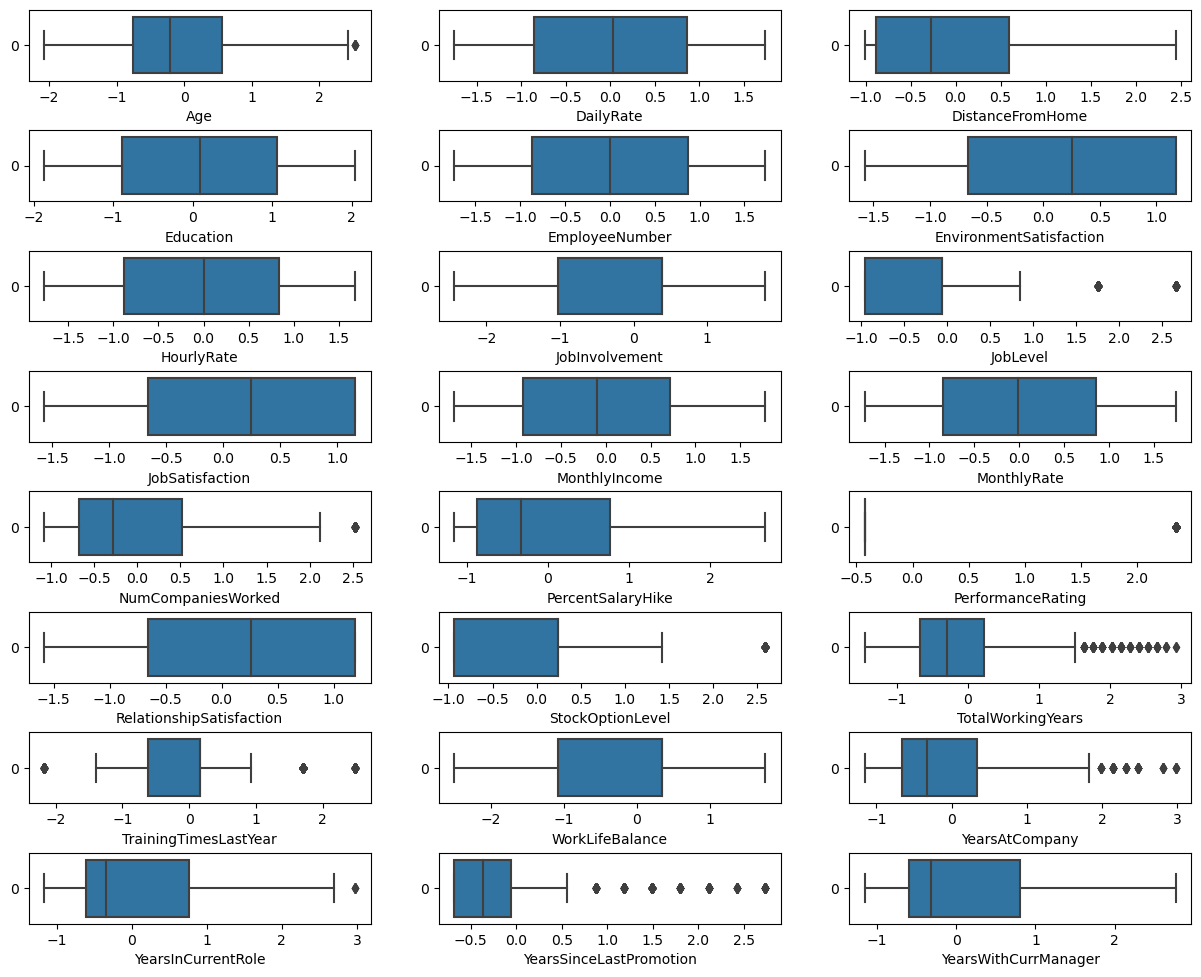

In [274]:
numerical_features= data.select_dtypes(include=int).columns
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace= 0.7, wspace= 0.2)
for i in range(len(numerical_features)):
    plt.subplot(10,3, i+1)
    plt.xlabel(numerical_features[i])
    sns.boxplot(normalized_data2[numerical_features[i]],orient='h')

In [275]:
out2= normalized_data2[(normalized_data2['TotalWorkingYears']>2.5) | (normalized_data2['YearsAtCompany']>2.5) | (normalized_data2['YearsSinceLastPromotion']>2.5)].index
len(out2)

74

In [276]:
normalized_data2.shape

(2774, 33)

In [277]:
normalized_data2.drop(out2, inplace=True)

In [278]:
normalized_data2.shape

(2700, 33)

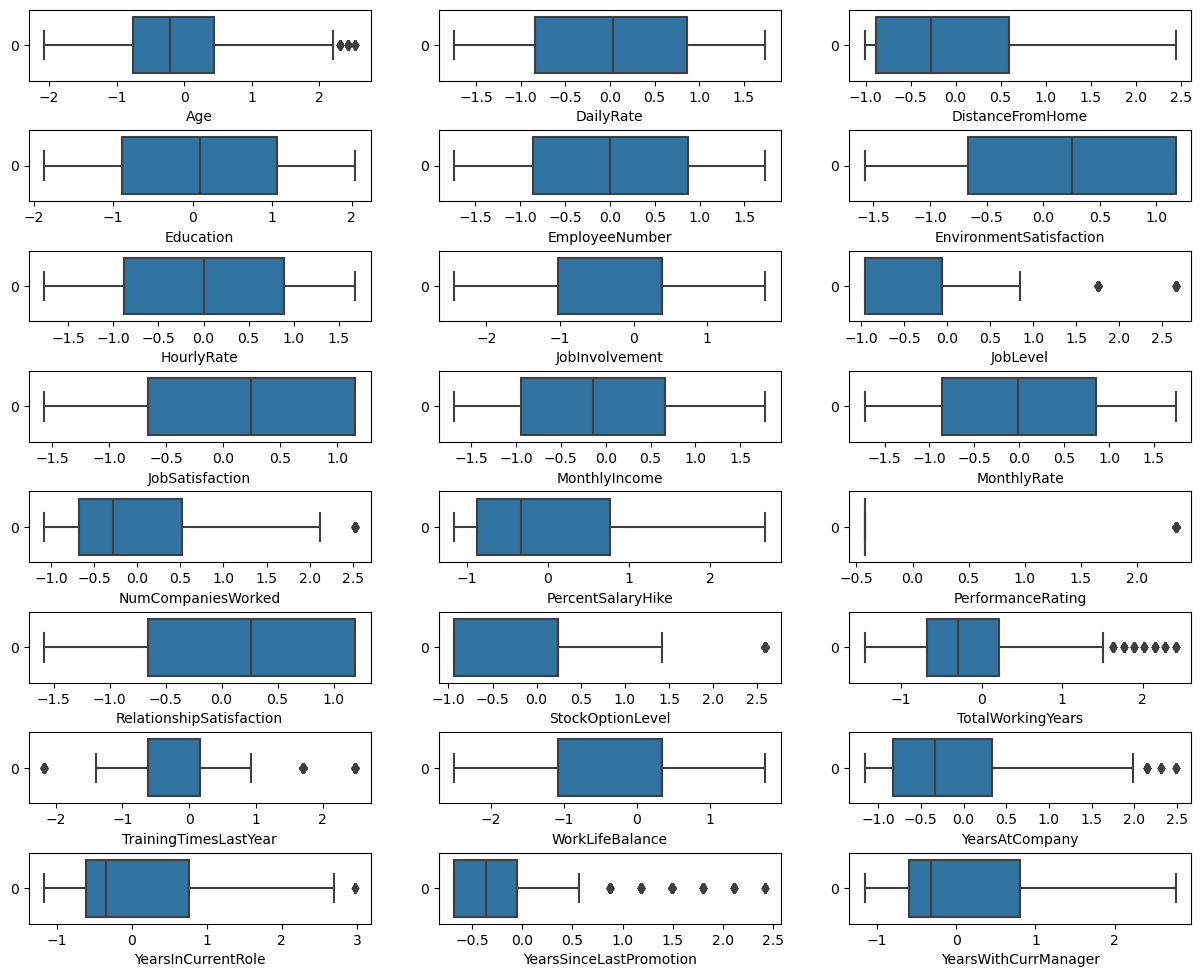

In [279]:
numerical_features= data.select_dtypes(include=int).columns
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace= 0.7, wspace= 0.2)
for i in range(len(numerical_features)):
    plt.subplot(10,3, i+1)
    plt.xlabel(numerical_features[i])
    sns.boxplot(normalized_data2[numerical_features[i]],orient='h')

### Correlation check

<Axes: >

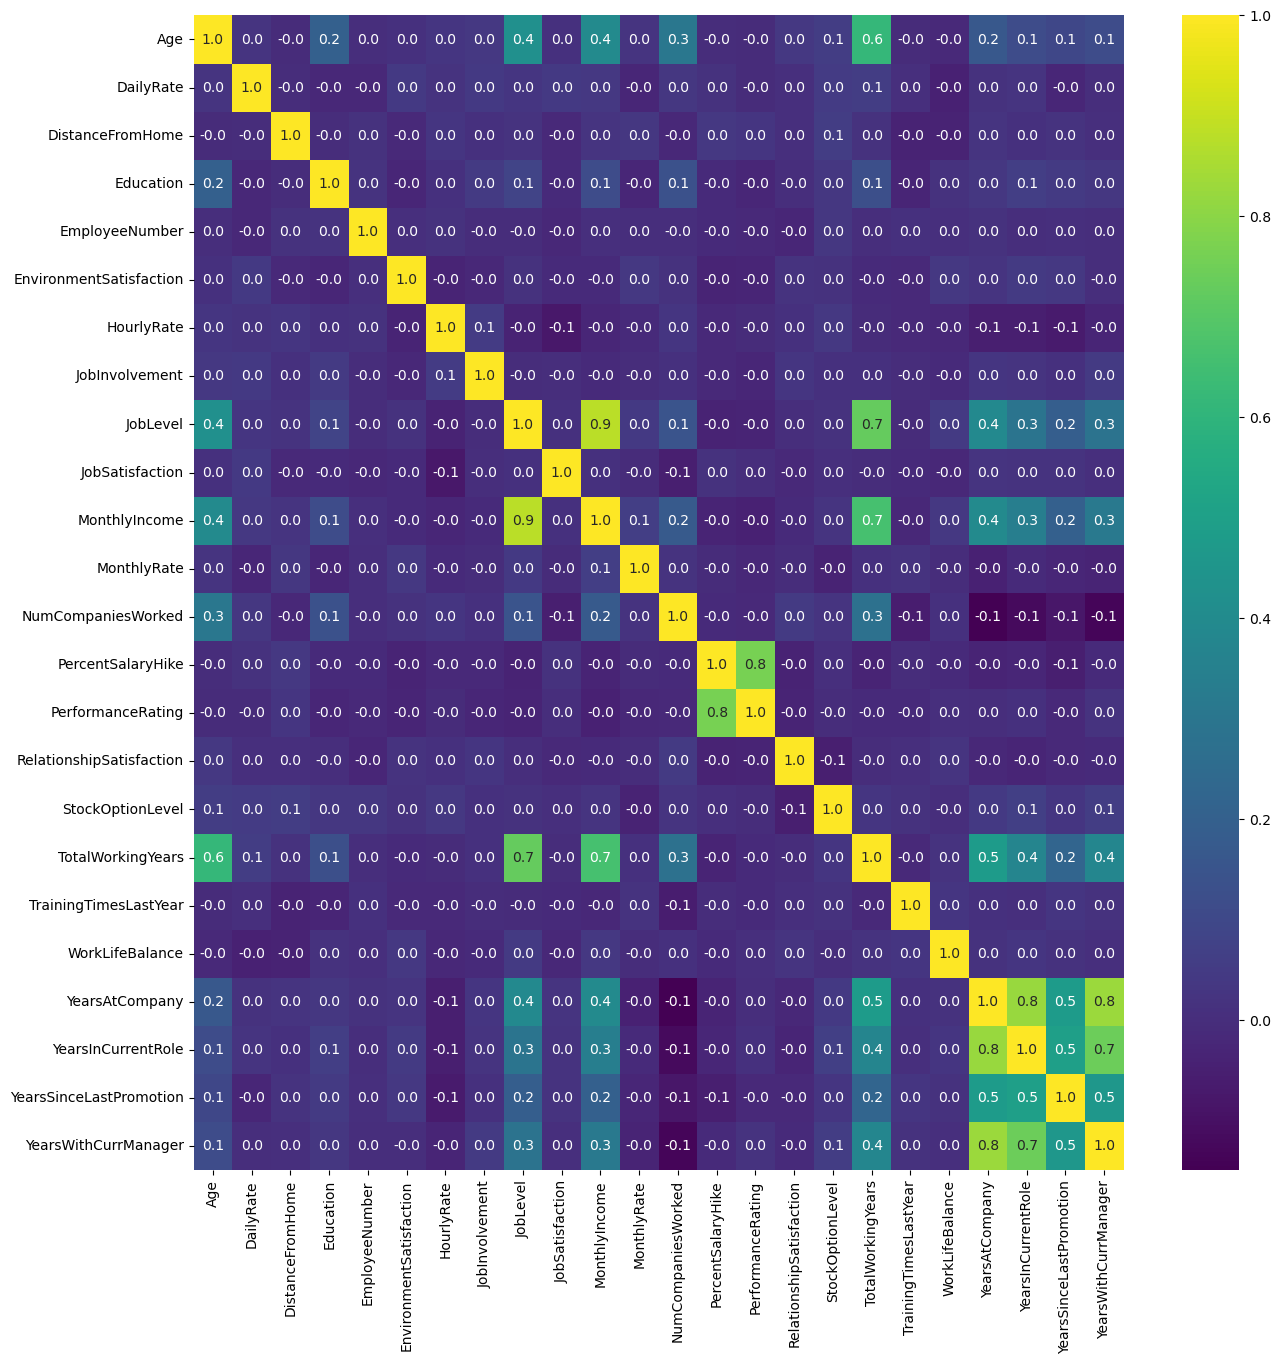

In [280]:
corr_mat= normalized_data2[numerical_features].corr()
plt.figure(figsize= (15,15))
sns.heatmap(corr_mat, annot= True, fmt= '.1f', cmap= 'viridis')

In [281]:
cor_feats=[]
for feature1 in numerical_features:
    for feature2 in numerical_features:
        if feature1!= feature2:
            if  ((feature1,feature2) not in cor_feats and (feature2,feature1) not in cor_feats):
                cor_val= normalized_data2[feature1].corr(normalized_data2[feature2])
                if cor_val> 0.75:
                    print(feature1,"           " ,feature2)
                    cor_feats.append((feature1,feature2))

JobLevel             MonthlyIncome
PercentSalaryHike             PerformanceRating
YearsAtCompany             YearsInCurrentRole
YearsAtCompany             YearsWithCurrManager


In [282]:
normalized_data2.drop(['JobLevel','PercentSalaryHike','YearsAtCompany'], axis=1, inplace= True)

In [283]:
normalized_data2.shape

(2700, 30)

### Random Forest model building

In [284]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier 

In [285]:
normalized_data2.reindex()

X= normalized_data2.drop('Attrition',axis=1)
y= normalized_data2['Attrition']

In [286]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [287]:
X_train.shape

(2160, 29)

In [288]:
param_dist = {'max_depth': list(range(4,10)),
              'bootstrap': [True],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini']
             }

In [289]:
Rf= RandomForestClassifier()

In [290]:
cv_rf = GridSearchCV(Rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

In [292]:
# cv_rf.fit(X_train, y_train)

In [296]:
# cv_rf.best_params_

In [297]:
Rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 9,
              bootstrap= True,
             oob_score= True)

RandomForestClassifier(max_depth=9, max_features='auto', oob_score=True)

In [299]:
# error_rate= {}

# for i in range(10,1000,50):
#     Rf.set_params(n_estimators= i)
#     Rf.fit(X_train, y_train)
    
#     oob_error = 1 - Rf.oob_score_
#     print(i, oob_error)
#     error_rate[i]= oob_error

In [304]:
# fig, ax = plt.subplots(figsize=(15, 10))
# oob_series= pd.Series(error_rate)
# oob_series.plot(kind= 'line', color='green')

In [301]:
Rf.set_params(n_estimators= 650)

RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=650,
                       oob_score=True)

In [305]:
Rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=650,
                       oob_score=True)

In [306]:
Rf.score(X_test, y_test)

0.9314814814814815